In [140]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [141]:
test=np.load('../data/ps3_genetic_fingerprints.npy')
df=pd.DataFrame(test, columns = ['col_{}'.format(i) for i in range(len(test[0,:]))])

In [142]:
pat_y=np.load('../data/ps3_patient_zet.npy')

# Data Exploration

In [143]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_376,col_377,col_378,col_379,col_380,col_381,col_382,col_383,col_384,col_385
0,2.638991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,6.865746,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,6.548630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5.142371,...,0.0,0.000000,0.000000,0.0,0.0,0.0,3.076563,0.0,0.0,0.0
2,3.108633,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.547944,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2.821922,0.0,0.0,0.0,0.0,0.0,0.0,0.969367,0.0,6.688834,...,0.0,1.442150,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,1.542966,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4.947426,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.846165,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,2.566699,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,3.055390,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,4.862554,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14395,1.948764,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,5.504622,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14396,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.051265,0.0,3.843067,...,0.0,3.599192,0.000000,0.0,0.0,0.0,3.121861,0.0,0.0,0.0


In [144]:
sames=[]
for i in range(len(df.max())):
    if df.max()[i]==df.min()[i]:
        sames.append(df.columns[i])

In [145]:
print(len(sames))

115


# Fitting and Plotting Silhouette Score for Non-Standardized Data

In [183]:
standard_sil=[]
kmax=10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k,random_state=1234).fit(df)
    labels = kmeans.labels_
    standard_sil.append(silhouette_score(df, labels, metric = 'euclidean'))

Text(0, 0.5, 'Silhouette Score')

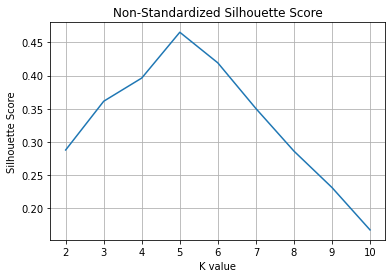

In [184]:
plt.plot([x for x in range(2,11)],standard_sil)
plt.grid()
plt.title('Non-Standardized Silhouette Score')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')

In [191]:
kmeans=KMeans(n_clusters=5,random_state=1234).fit(df)
kmeans.predict(pat_y.reshape(1,-1))

array([0], dtype=int32)

In [192]:
similar=[]
for i in kmeans.labels_:
    if i == 0:
        similar.append(1)
    else:
        similar.append(0)

Exporting predictions to test in Kaggle

In [193]:
export_df=pd.DataFrame(similar,columns=['Predicted'])
export_df.reset_index(inplace=True)
export_df.rename(columns={"index":"ID"},inplace=True)
export_df.to_csv('normal_predicted.csv',index=False)

# Fitting and Plotting Silhouette Score for Standardized Data

In [151]:
scaler=StandardScaler()
scaler.fit(df)
scaled=scaler.transform(df)

In [185]:
scaled_sil=[]
kmax=10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k,random_state=1234).fit(scaled)
    labels = kmeans.labels_
    scaled_sil.append(silhouette_score(scaled, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Standardized Silhouette Score')

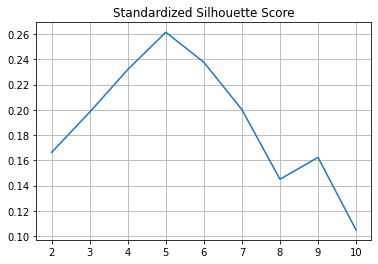

In [186]:
plt.plot([x for x in range(2,11)],scaled_sil)
plt.grid()
plt.title('Standardized Silhouette Score')

In [187]:
kmeans=KMeans(n_clusters=5,random_state=1234).fit(scaled)

In [188]:
scaled_pat_y=scaler.transform(pat_y.reshape(1,-1))
kmeans.predict(pat_y.reshape(1,-1))

array([0], dtype=int32)

In [189]:
similar=[]
count=0
for i in kmeans.labels_:
    if i == 0:
        similar.append(1)
        count+=1
    else:
        similar.append(0)

Exporting predictions to test in Kaggle

In [157]:
export_df=pd.DataFrame(similar,columns=['Predicted'])

In [158]:
export_df.reset_index(inplace=True)
export_df.rename(columns={"index":"ID"},inplace=True)

In [159]:
export_df.to_csv('scaled_predicted.csv',index=False)

Comparing the results of standardized vs non-standardized

In [194]:
kmeans=KMeans(n_clusters=5,random_state=1234).fit(df)
normal_labels=kmeans.labels_
kmeans=KMeans(n_clusters=5,random_state=1234).fit(scaled)
scaled_labels=kmeans.labels_
print('Normal sil:', silhouette_score(df,normal_labels,metric='euclidean'))
print('Scaled sil:', silhouette_score(df,scaled_labels,metric='euclidean'))
print('Normal sil:', silhouette_score(scaled,normal_labels,metric='euclidean'))
print('Scaled sil:', silhouette_score(scaled,scaled_labels,metric='euclidean'))

Normal sil: 0.46517515
Scaled sil: 0.4649037
Normal sil: 0.26135182
Scaled sil: 0.2615579


# PCA and Visualizations

In [160]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled)

In [161]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [162]:
principalDf

,principal component 1,principal component 2
0,3.618233,3.186956
1,-8.250573,6.629705
2,-6.277117,-7.923242
3,-7.447539,6.526959
4,-7.067524,4.746661
...,...,...
14393,1.898533,3.278014
14394,10.507366,0.778289
14395,4.641644,1.870798
14396,-5.512400,6.396312


Text(0.5, 1.0, 'PCA Clusters')

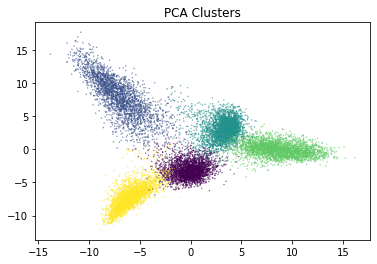

In [175]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=.1,c=kmeans.labels_)
plt.title('PCA Clusters')

Text(0.5, 1.0, 'PCA Clusters w Test Patient in Red')

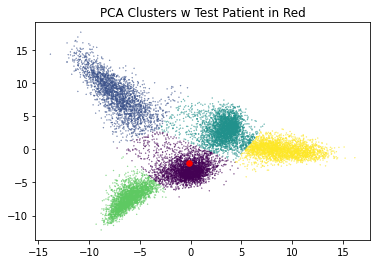

In [173]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],s=.1,c=kmeans.labels_)
plt.scatter(pca_y[0][0],pca_y[0][1],s=30,c='r')
plt.title('PCA Clusters w Test Patient in Red')

In [195]:
print('Number of people in test patient cluster:', count)

Number of people in test patient cluster: 2886
